# Oddstradamus
### Good odds and where to find them

### EDA

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import rcParams
warnings.filterwarnings('ignore')

In order to be able to derive a procedure starting from the raw data set, we first load the merged raw data set and reduce it to the basic columns.

In [2]:
# loading the merged dataframe
data = pd.read_csv('Data/Results2013_2021.csv')

In [3]:
# selecting the necessary columns of the original data set
data = data[['Div', 'Season', 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 
             'HC', 'AC', 'HY', 'AY', 'HR', 'AR','B365H','B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 
             'WHH', 'WHD', 'WHA']]
data.head()

,Div,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,...,B365A,BWH,BWD,BWA,IWH,IWD,IWA,WHH,WHD,WHA
0,B1,13/14,Club Brugge,Charleroi,2.0,0.0,H,NaN,NaN,NaN,...,9.0,1.35,4.6,7.00,1.3,4.4,8.5,1.30,5.0,9.00
1,B1,13/14,Bergen,Cercle Brugge,1.0,1.0,D,NaN,NaN,NaN,...,4.2,1.90,3.6,3.40,1.9,3.3,3.5,1.91,3.3,3.80
2,B1,13/14,Genk,Oostende,3.0,0.0,H,NaN,NaN,NaN,...,6.0,1.40,4.4,6.25,1.4,4.0,6.5,1.50,4.2,5.50
3,B1,13/14,Kortrijk,Oud-Heverlee Leuven,1.0,0.0,H,NaN,NaN,NaN,...,3.8,1.80,3.4,4.00,1.9,3.2,3.6,1.91,3.3,3.80
4,B1,13/14,Lierse,Waregem,1.0,2.0,A,NaN,NaN,NaN,...,2.3,3.00,3.4,2.10,3.0,3.1,2.2,3.00,3.1,2.15


### Correlation

Since the goal is basically to predict football matches, the column 'FTR' can be identified as the target.
Since the number of goals scored is the only way to change the target, we look at the correlation matrix of the existing features. We pay special attention to the features 'FTHG' and 'FTAG', as they seem to be the most important ones. With the help of the correlation matrix, it is necessary to find out how these features are influenced and to what extent there is a connection between the individual features.

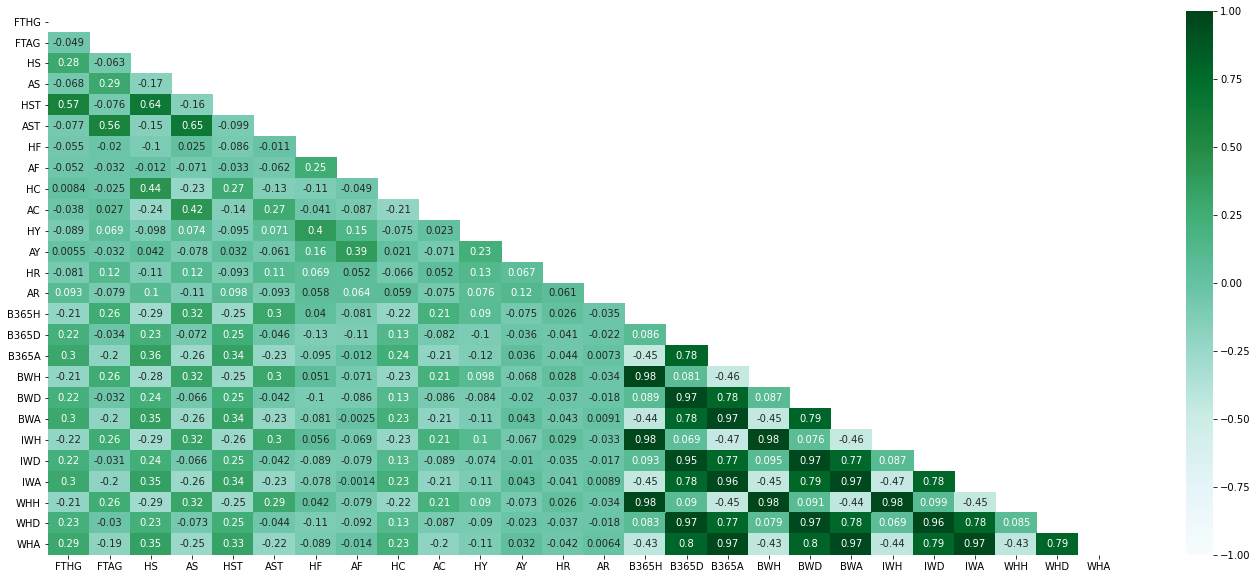

In [4]:
# output of the correlation matrix
correlations = data.corr()
mask = np.triu(correlations)
fig, ax = plt.subplots(figsize=(24,10))
sns.heatmap(correlations , vmax=1, vmin=-1, annot=True, mask=mask, cmap="BuGn");

As can be seen from the graph, the greatest correlation with the number of goals is with the number of shots on target.
This in turn correlates most strongly with the number of shots and these in turn with the number of corners. There is not much of a correlation between the features mentioned and the number of fouls and red cards, so that these features will not be considered in greater detail in connection with match prediction.
Another striking feature is the high correlation between the betting odds of the different bookmakers. To simplify the analysis, these odds have already been combined into an average value.

### Number of matches
#### Differences between raw data and prepared data

In addition to the above-mentioned summary of the odds, numerous additional features were created for the utilisation of the match data. This is done in the notebook [Data Processing](https://github.com/mue94/oddstradamus/blob/main/02_Data_Processing.ipynb). In the course of the EDA, in some cases a data set is used which already contains the features mentioned. This is now loaded into the notebook.

In [5]:
# loading the prepared dataframe
df = pd.read_csv('Data/EDA.csv', index_col=[0])
df.head()

,Div,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,...,two_way_home,two_way_away,proba_total,real_proba_home,real_proba_away,dc_away,dc_home,diff_exp_val_home,diff_exp_val_away,cross_diff_points_before
1086,SC0,13/14,Partick,Dundee United,0.0,0.0,D,10.0,10.0,3.0,...,No win,No win,1.098957,0.324115,0.389285,1.346315,1.489981,2.8075,2.3375,0.0
1087,SC0,13/14,Aberdeen,Kilmarnock,2.0,1.0,H,4.0,3.0,2.0,...,Win,No win,1.101249,0.471108,0.255792,1.716909,1.220169,1.9275,3.5500,0.0
1088,SC0,13/14,Celtic,Ross County,2.0,1.0,H,25.0,5.0,9.0,...,Win,No win,1.097304,0.733460,0.091706,3.419090,1.003336,1.2425,9.9375,0.0
1089,SC0,13/14,Inverness C,St Mirren,3.0,0.0,H,6.0,6.0,3.0,...,Win,No win,1.098807,0.475236,0.251056,1.734263,1.215148,1.9150,3.6250,0.0
1090,SC0,13/14,Hibernian,Motherwell,0.0,1.0,A,8.0,11.0,3.0,...,No win,Win,1.080053,0.322045,0.388617,1.365696,1.514403,2.8750,2.3825,0.0


After the cleaning of the data in the data processing notebook was completed, some rows were eliminated, which
could not provide a lot of basic information. In order to give a small overview of what kind of
type of games we compare the number of games per season before and after the cleaning of the data.

<AxesSubplot:title={'center':'Number of games per season after cleaning'}, xlabel='Season', ylabel='count'>

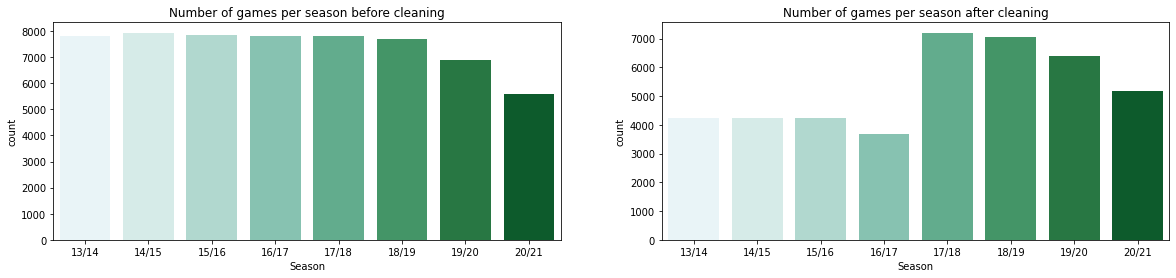

In [6]:
# plotting number of matches per season
fig, axs = plt.subplots(ncols=2, figsize=(20, 4))
palette = 'BuGn'

axs[0].set_title('Number of games per season before cleaning'), axs[1].set_title('Number of games per season after cleaning')
sns.countplot(x = 'Season', data = data, palette = palette, ax = axs[0])
sns.countplot(x = 'Season', data = df, palette = palette, ax = axs[1])

The number of matches from 13/14 to 18/19 varies only marginally. The small variation can be explained by changes in the playing modes of individual leagues, such as the Belgian Division 1A. The number of matches in the 19/20 season is significantly lower than the number of matches in the previous seasons. This circumstance is related to the Corona pandemic, as some leagues were cancelled in the course of it and thus fewer games were played overall. The 20/21 season is still running at the moment, so this number is also significantly lower than that of the previous seasons.

A pattern can also be seen with regard to those matches that were removed from the data set in the course of the cleaning process. A large proportion of these come from the seasons 13/14 to 16/17, as there is a smaller amount of match information available for matches from this period. However, matches from the other seasons were also removed. However, this was not done according to a pattern that can be derived from this chart.

### Distribution of events
#### Review of the home advantage

The aim of this project is to predict football matches, therefore it must first be determined which 3 outcomes a football match has. These are the home win, the away win and the draw. It is interesting to see whether the outcomes are more or less equally distributed or whether there is a tendency towards a certain outcome. Accordingly, we look at this in a graph.

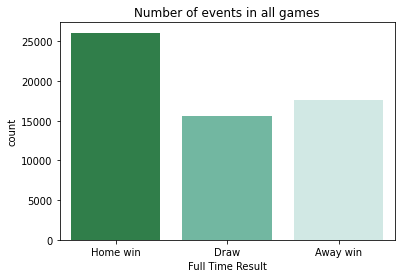

In [7]:
# Plotting the distribution of events
palette = 'BuGn_r'
ax = sns.countplot(data = data, x = 'FTR', palette = palette)
ax.set_title('Number of events in all games')
ax.set_xticklabels(['Home win', 'Draw', 'Away win'])
ax.set(xlabel='Full Time Result');

As one can easily see, there is no equal distribution between the 3 different outcomes. Rather, there is a clear dominance of home wins. Almost 44% of all matches in the sample ended with this result. This was followed by away victories in just under 30% of all matches and draws in just under 26% of all matches.

To check whether the _home advantage_ exists globally, let's take a look at the distribution of exits in the different leagues.

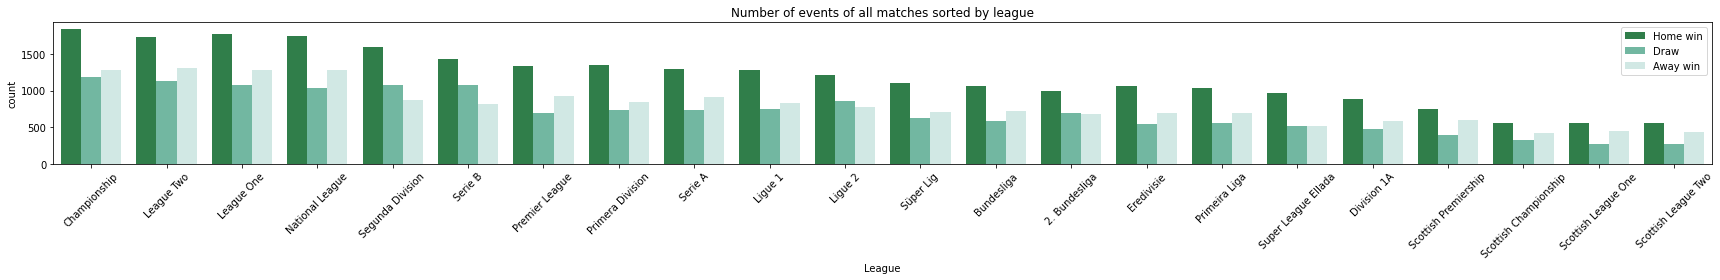

In [23]:
# Plotting the distribution of events per league
fig, ax = plt.subplots(figsize= (24,4))
x = sns.countplot(data = data, x = 'Div', hue = 'FTR', order = data['Div'].value_counts().index, palette = palette)
ax.set_title('Number of events of all matches sorted by league')
ax.set_xticklabels(['Championship', 'League Two', 'League One', 'National League', 'Segunda Division', 'Serie B', 'Premier League', 'Primera Division', 'Serie A', 'Ligue 1', 'Ligue 2', 'Süper Lig', 'Bundesliga', '2. Bundesliga', 'Eredivisie', 'Primeira Liga', 'Super League Ellada', 'Division 1A', 'Scottish Premiership', 'Scottish Championship', 'Scottish League One', 'Scottish League Two'])
ax.set(xlabel='League')
plt.xticks(rotation=45)
plt.legend(['Home win', 'Draw', 'Away win']);

The _home advantage_ seems to exist in all of the leagues. However, it is noticeable that in the second leagues in Spain, France and Italy, more matches tend to end in a draw than in an away win.

At this point, it is interesting to see whether the distribution of the outcomes is ultimately also reflected in the three-way odds. In order to understand this, one must understand how a betting odds is composed. Betting odds reflect the probability of the outcome. If it is assumed that a team will leave the field as the winner with a high degree of certainty, the odds will be quite low. Conversely, the less likely the outcome, the higher the associated betting odds. The decimal odds of the bookmakers can be calculated according to the following scheme: 

1 / probability of occurrence * 100

In order to check whether the recognised _home advantage_ is reflected in the betting odds, we use the Bundesliga as an example to determine the average winning odds of all teams from 2013 to 2021 for both home and away matches. We then determine the difference between the average odds and can see whether the _home advantage_ was taken into account when compiling the odds.

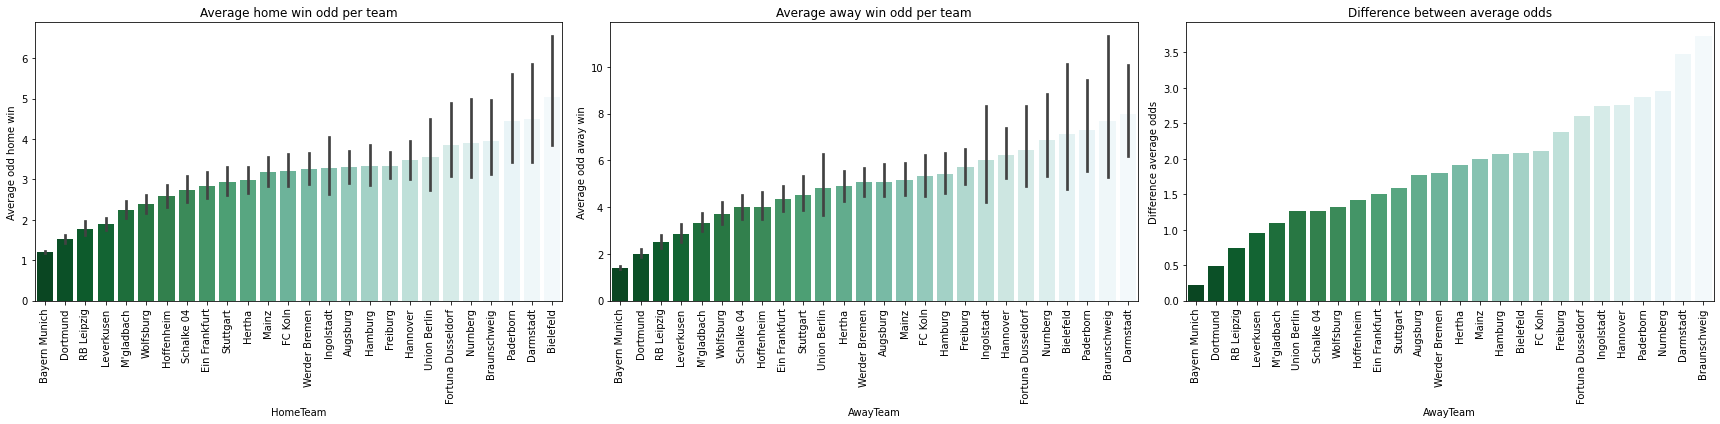

In [24]:
# Average win odd per team in Bundesliga example
fig, axs = plt.subplots(ncols=3, figsize=(24, 6))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

div = df[df['Div'] == 'D1']
avghome = df.groupby(div["HomeTeam"])['AvgHome'].aggregate(np.mean).reset_index().sort_values('AvgHome')
avgaway = df.groupby(div["AwayTeam"])['AvgAway'].aggregate(np.mean).reset_index().sort_values('AvgAway')
diff = (div.groupby(['AwayTeam'])['AvgAway'].mean() - div.groupby(["HomeTeam"])['AvgHome'].mean()).sort_values()

axs[0].set_title('Average home win odd per team'), axs[1].set_title('Average away win odd per team'), axs[2].set_title('Difference between average odds')
sns.barplot(x = div['HomeTeam'], y = 'AvgHome', data = df, order = avghome['HomeTeam'], ax = axs[0], palette = palette)
sns.barplot(x = div['AwayTeam'], y = 'AvgAway', data = df, order = avgaway['AwayTeam'], ax = axs[1], palette = palette)
sns.barplot(x = diff.index, y = diff.values, ax = axs[2], palette = palette);
axs[0].set(ylabel='Average odd home win'), axs[1].set(ylabel='Average odd away win'), axs[2].set(ylabel='Difference average odds'),
rcParams.update({'figure.autolayout': True})

As you can see in the plot on the right, the difference between the average away win odds for all teams is higher than the odds for a home win. Accordingly, it can be assumed that the _home advantage_ is definitely taken into account by the bookmakers.

In summary, it can be said at this point that there seems to be a _home advantage_ and it is precisely this that the bookmakers factor into the betting odds. A probability of 44% for a three-way result does not sound too bad at this point. However, it should be noted that in the case of a bet on a home win in a normal three-way bet, the 44% probability of occurrence is offset by a 56% non-probability of occurrence. Accordingly, one can take a two-way view of the outcomes. Either the bet event occurs and one has won the bet, or the event does not occur and the bet is lost. Accordingly, in the further course we will only focus on the two-way view of football matches.

### Deviations from the expected value

In this part, we examine to what extent the deviation of the odds from the expected value can be helpful when placing a sports bet. In this context, we define expected value as the average odds of a team when the respective event occurs.

For the following chart, the average odds for home and away wins were determined for all teams. The data sets were then divided according to whether the odds of the matches were above or below the average value determined and the number of wins or no wins was depicted.

In [31]:
# define the function for the visualisation of the expected value deviation
def teamavg(team):
    team_home = df[df['HomeTeam'] == team]
    team_home_mean = team_home['AvgHome'].mean()
    team_home_over = team_home[team_home['AvgHome'] > team_home_mean]
    team_home_under = team_home[team_home['AvgHome'] < team_home_mean]
    rslts_home_over = team_home_over['two_way_home'].value_counts()
    rslts_home_under = team_home_under['two_way_home'].value_counts()

    team_away = df[df['AwayTeam'] == team]
    team_away_mean = team_away['AvgAway'].mean()
    team_away_over = team_away[team_away['AvgAway'] > team_home_mean]
    team_away_under = team_away[team_away['AvgAway'] < team_home_mean]
    rslts_away_over = team_away_over['two_way_away'].value_counts()
    rslts_away_under = team_away_under['two_way_away'].value_counts()
    
    palette_plot ={"Win": '#4FBA52', "No win": "#D2373D"}
        
    fig, axs = plt.subplots(ncols=4, figsize=(24, 3))
    fig.suptitle(team)
    for i in range(4):
         axs[i].set(ylabel = 'Share in percent')
    axs[0].set_title('Proportion of home wins with odds below expected value'), axs[1].set_title('Proportion of away wins with odds below expected value'), axs[2].set_title('Proportion of home wins with odds above expected value'), axs[3].set_title('Proportion of away wins with odds below expected value')
    sns.barplot(x = rslts_home_under.index, y = rslts_home_under.values, estimator=lambda x: x.sum() / len(team_home_under) * 100, order = ['Win', 'No win'], palette = palette_plot, ax = axs[0])
    sns.barplot(x = rslts_away_under.index, y = rslts_away_under.values, estimator=lambda x: x.sum() / len(team_away_under) * 100, order = ['Win', 'No win'], palette = palette_plot, ax = axs[1])
    sns.barplot(x = rslts_home_over.index, y = rslts_home_over.values, estimator=lambda x: x.sum() / len(team_home_over) * 100, order = ['Win', 'No win'], palette = palette_plot, ax = axs[2])
    sns.barplot(x = rslts_away_over.index, y = rslts_away_over.values, estimator=lambda x: x.sum() / len(team_away_over) * 100, order = ['Win', 'No win'], palette = palette_plot, ax = axs[3])
    return fig, axs 

First, let's look at the chart with absolute favourite teams. The 5 teams with the lowest overall average odds for their wins. FC Bayern München, Ajax Amsterdam, Celtic Glasgow, Paris Saint-Germain and FC Barcelona were selected.

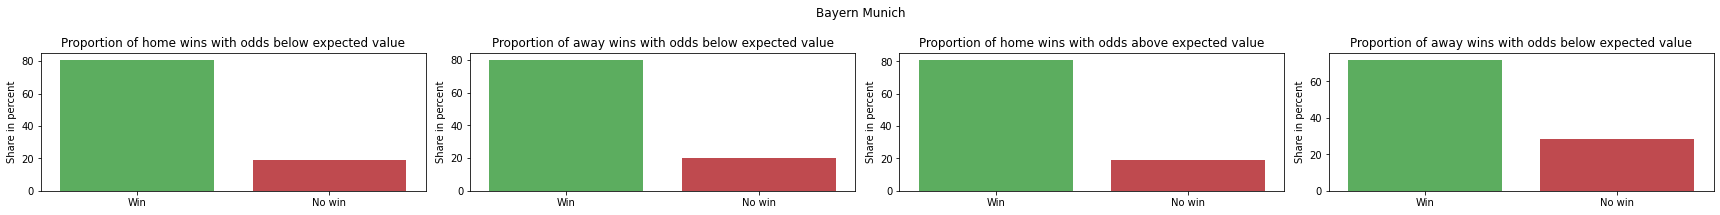

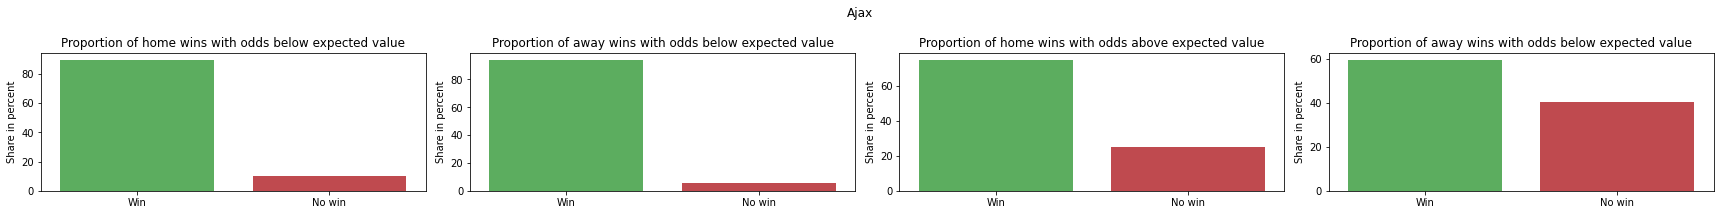

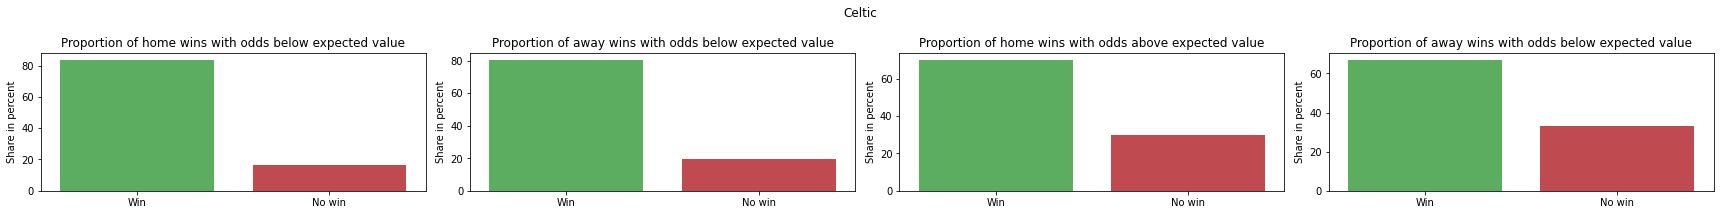

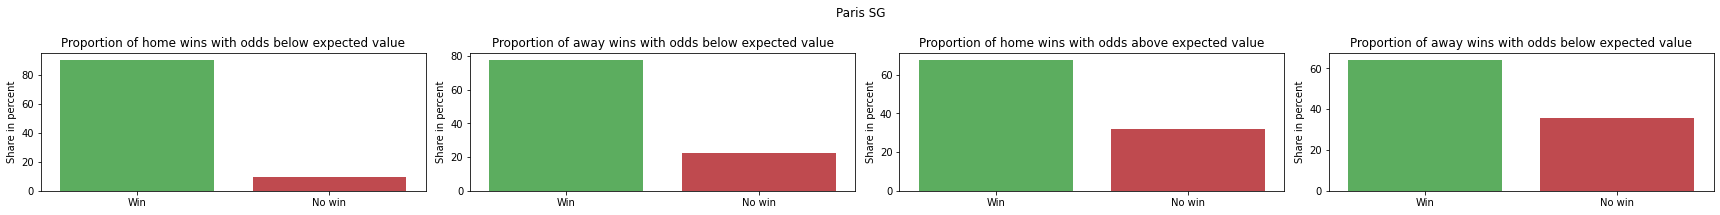

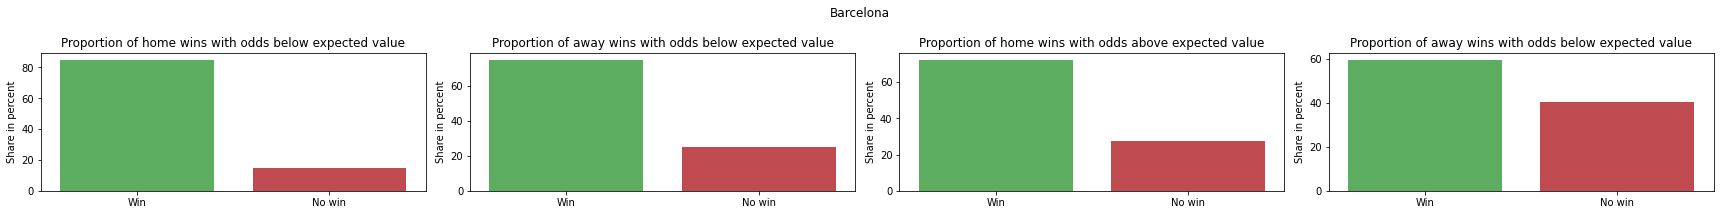

In [11]:
# plotting the win-loss ratio per team
fav_teams = ['Bayern Munich', 'Ajax', 'Celtic', 'Paris SG', 'Barcelona']
for team in fav_teams:
    teamavg(team)

In addition, we examine the corresponding chart with 5 randomly selected _midfield teams_ of the 5 biggest leagues to be able to recognise possible deviations. In this context, Bayer 04 Leverkusen, OSC Lille, West Ham United, Real Sociedad San Sebastian and FC Bologna were selected.

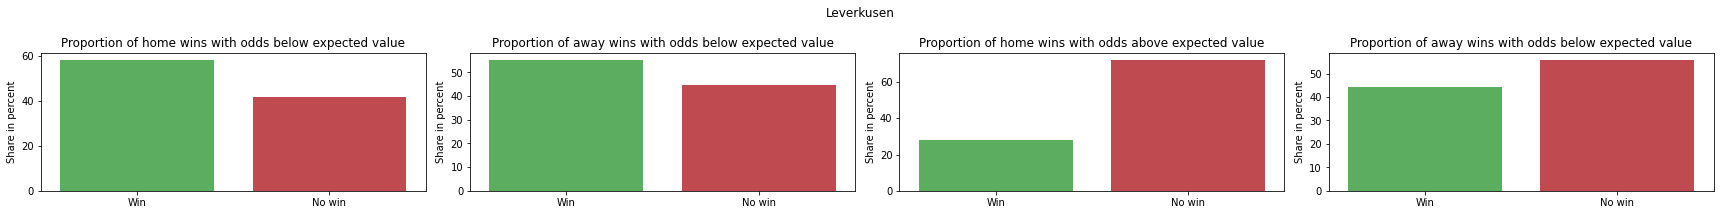

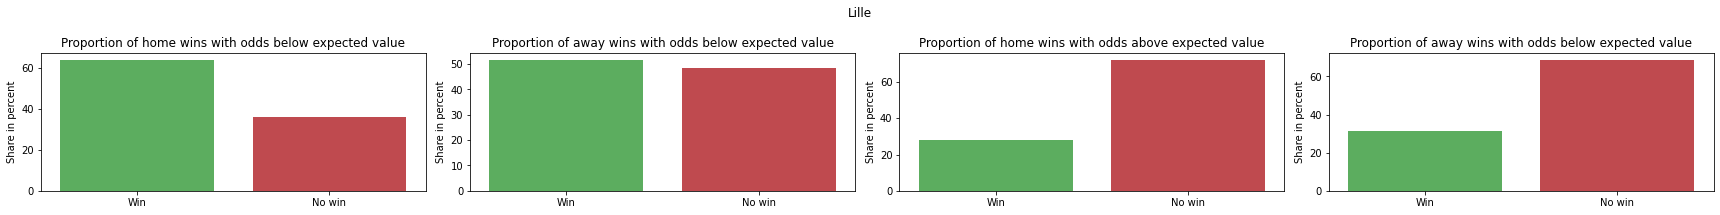

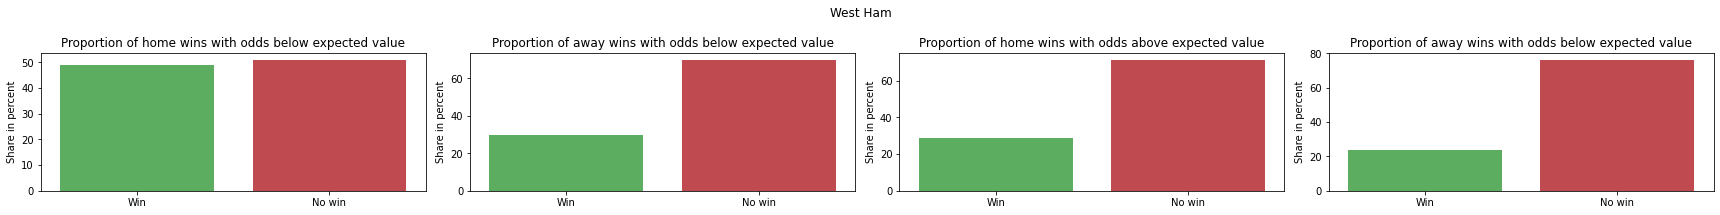

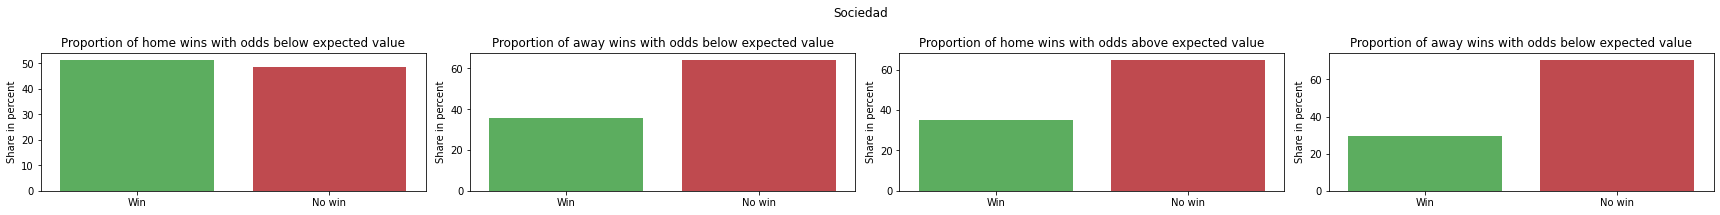

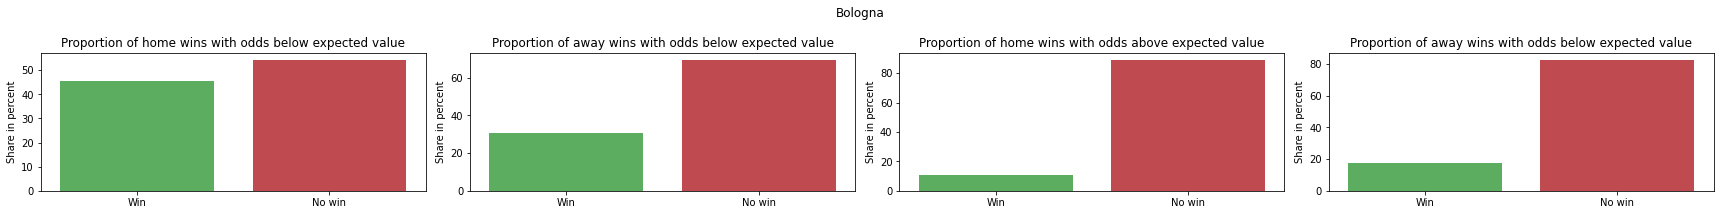

In [12]:
# plotting the win-loss ratio per team
mid_teams = ['Leverkusen', 'Lille', 'West Ham', 'Sociedad', 'Bologna']
for team in mid_teams:
    teamavg(team)

Among the favourite teams, it can be observed that matches with a win odd below the mean are won with a significantly higher frequency than matches with a win odd above the mean. In addition, the _home advantage_ can be read off again. The win odd in home matches tends to be higher than in away matches, regardless of the mean value. 

In the case of the _midfield teams_, it is noticeable that within the arbitrary sample, more home matches are also won in matches with odds below the mean. However, this correlation cannot be verified for matches with odds above the mean. Home and away wins appear quite balanced. 

To gain a deeper insight into the average odds, let's look at the distribution of average odds across all teams.

In [13]:
# determine the average odds for a home or away win per team
home_mean = (df.groupby(['HomeTeam'])['AvgHome'].mean())
away_mean = (df.groupby(['AwayTeam'])['AvgAway'].mean())

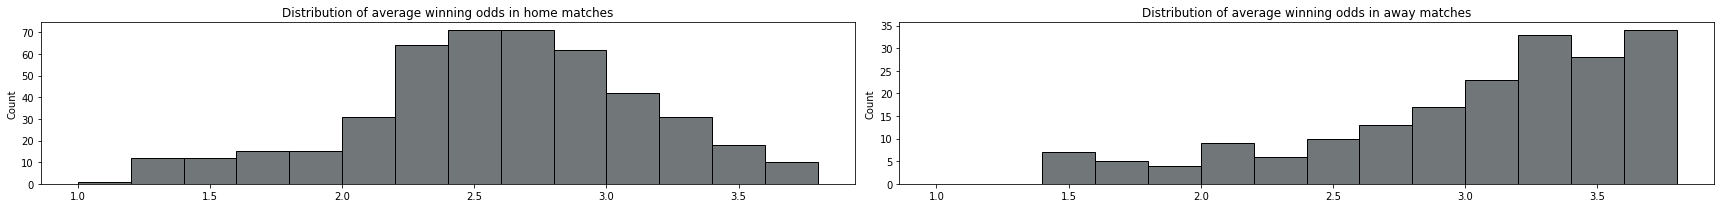

In [14]:
# plotting the distribution of the average odds
bins = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, np.inf]

color = '#42494C'

fig, axs = plt.subplots(ncols=2, figsize=(24, 3))
axs[0].set_title('Distribution of average winning odds in home matches'), axs[1].set_title('Distribution of average winning odds in away matches')
sns.histplot(x = home_mean.values, bins = bins, color = color, ax = axs[0])
sns.histplot(x = away_mean.values, bins = bins, color = color, ax = axs[1]);

Next, we identify the teams that fall within a certain range of values in terms of their average odds. We then check how well these teams perform in matches within a certain range of match-specific win odds.

In [47]:
# define the function for the visualisation
def odd_ranges(vr1, vr2, bin1, bin2): 
    mean_h = home_mean.to_frame()
    exp_val_h = mean_h[(mean_h['AvgHome'] >= vr1) & (mean_h['AvgHome'] <= vr2)]
    picked_teams_h = list(exp_val_h.index.values)

    mean_a = away_mean.to_frame()
    exp_val_a = mean_a[(mean_a['AvgAway'] >= vr1) & (mean_a['AvgAway'] <= vr2)]
    picked_teams_a = list(exp_val_a.index.values)

    df_home = df[df['HomeTeam'].isin(picked_teams_h)]
    df_away = df[df['AwayTeam'].isin(picked_teams_a)]


    bins = [bin1, bin2]
    
    palette_plot ={"Win": '#4FBA52', "No win": "#D2373D"}

    fig, axs = plt.subplots(ncols=2, figsize=(7, 4))
    axs[0].set_title('Proportion of wins in home matches'), axs[1].set_title('Proportion of wins in away  matches')
    sns.histplot(x = df_home['AvgHome'], hue = df_home['two_way_home'], multiple = 'dodge', stat = 'probability', bins = bins, hue_order = ['Win', 'No win'], palette = palette_plot, ax = axs[0])
    sns.histplot(x = df_away['AvgAway'], hue = df_away['two_way_away'], multiple = 'dodge', stat = 'probability', bins = bins, hue_order = ['Win', 'No win'], palette = palette_plot, ax = axs[1]);

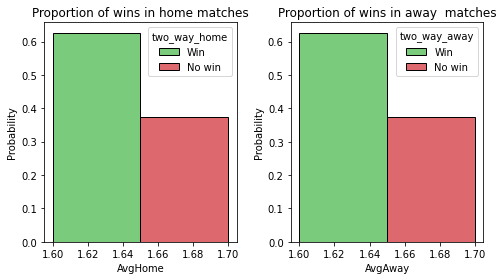

In [48]:
# plotting the win-loss ratio for teams in the average odd value range 1,6 - 1,7 and the odd value range 1,6 - 1,7
odd_ranges(1.6,1.7,1.6,1.7)

It is interesting to note that teams with average odds in the range of 1.6 to 1.7 win at odds in this range as often as the odds predict. The probability of a win in this case is 58.8 to 62.5% percent and this is reflected in the graph.

However, if we now examine favourite teams from a value range of 1.0 to 1.5 as average odds, the expectation deviates from the result.

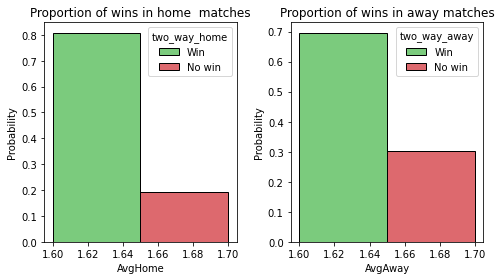

In [44]:
# plotting the win-loss ratio for teams in the average odd value range 1,0 - 1,5 and the odd value range 1,6 - 1,7
odd_ranges(1.0,1.5,1.6,1.7)

As can be seen, the probability of occurrence is 80% and 70%, respectively, despite the odds that predict an occurrence of just under 60%. 
If we now look at the opposite case and instead of the _favourite teams_ we examine _outsider teams_ (mean value of 2.2 - 2.6) and a value range with a high probability of occurrence (1.4 - 1.6 / probability of occurrence: 62.5 - 71.4%), we can also see a strong deviation from the expected value. Instead of the expected 60-70% of the matches, only just over 40% of the matches are won. This can be seen in the following graph:

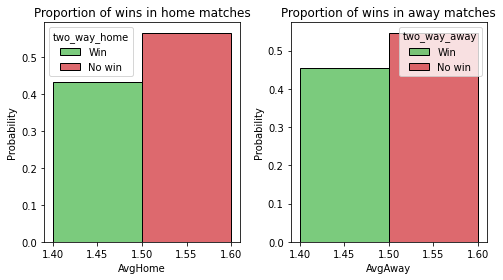

In [18]:
# plotting the win-loss ratio for teams in the average odd value range 2,2 - 2,6 and the odd value range 1,4 - 1,6
odd_ranges(2.2,2.6,1.4,1.6)

When examining the expected value, we first recognised that the difference between home and away matches became even clearer, especially in the case of top teams. In addition, we can see a tendency that matches with odds below the average team expectation value are won more often than matches with odds above the average team expectation value. This observation is consistent with the logic of odds, which states that games with lower odds have a higher probability of occurring and, conversely, games with high odds have a lower probability of occurring.

However, the performance of teams within certain value ranges cannot verify exactly this. Only teams whose expected value lies within the selected value range reflect the odds in their performance. If the teams' expected values are above or below this, they do not fulfil the probability of occurrence. One can deduce from this that the probabilities of occurrence of the odds can or must be interpreted differently depending on the team.

### Match Ratings

In this part of the EDA, we devote ourselves to examining so-called match ratings and their usability in the context of sports betting.

Rating systems are quantitative measures of the superiority of one team over the other. In this context, the difference between the two opponents is determined. Simple variants are, for example, the difference in points, goals scored or goals conceded. The advantage of this evaluation system is that the quality of the opponent is included in the consideration.


For a better understanding, let's first look at the distribution of matches in a match rating based on the difference in scores.

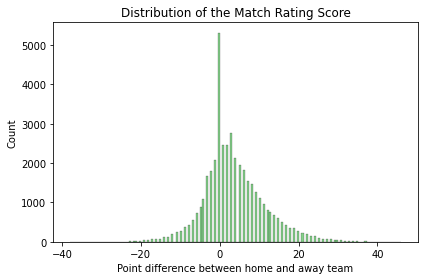

In [19]:
# Plotting the match rating of the pointscore
ax = sns.histplot(df['cross_diff_points_before'], color = '#5CC163')
ax.set_title('Distribution of the Match Rating Score')
ax.set(xlabel='Point difference between home and away team');

The difference underlying this model is the difference between the number of points received by the home team in home matches and the number of points received by the away team in away matches. The higher the match rating, the more the score of the home team dominates that of the away team. Accordingly, a higher match rating should be associated with a higher probability of a home win. We look at this correlation accordingly.

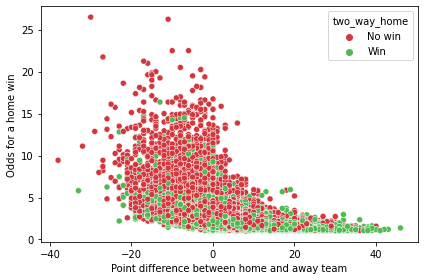

In [20]:
# plotting the relationship between match rating and probability of occurrence
palette_scatter ={"Win": '#4FBA52', "No win": "#D2373D"}
sns.scatterplot(x = df['cross_diff_points_before'], y = df['AvgHome'], hue = df['two_way_home'], palette = palette_scatter)
plt.xlabel('Point difference between home and away team')
plt.ylabel('Odds for a home win');

As you can see from the plot, the density of home wins in the area of a high match rating is significantly higher than with a low match rating. It can also be seen that the number of home matches with a high match rating tends to be accompanied by lower odds and that these lead to a win in more cases than high odds.

A large number of additional match rating features were set up in the Notebook Data Processing. The effectiveness of various ratings for the Bundesliga scenario in the 2019/20 season is shown in the following plot as an example.

In [21]:
def match_r(league, rating, season):
    league = df.loc[(df['Div'] == league)  & (df['Season'] == season)]
    
    #palette_plot1 ={"Win": '#4FBA52', "No win": "#D2373D"}
    palette_plot ={"Win": '#5CC163', "No win": "#D2373D"}
                    
    fig, axs = plt.subplots(nrows=2, figsize=(20,5))
    axs[0].set_title('Distribution of the Match Rating'), axs[1].set_title('Proportion of games won or lost for a given match rating')
    sns.histplot(data=league, x = rating, ax = axs[0], color = '#42494C')
    sns.histplot(data=league, x = rating, hue = 'two_way_home', multiple = 'fill', kde=True, stat='probability', palette = palette_plot, ax = axs[1])
    
    return fig, axs

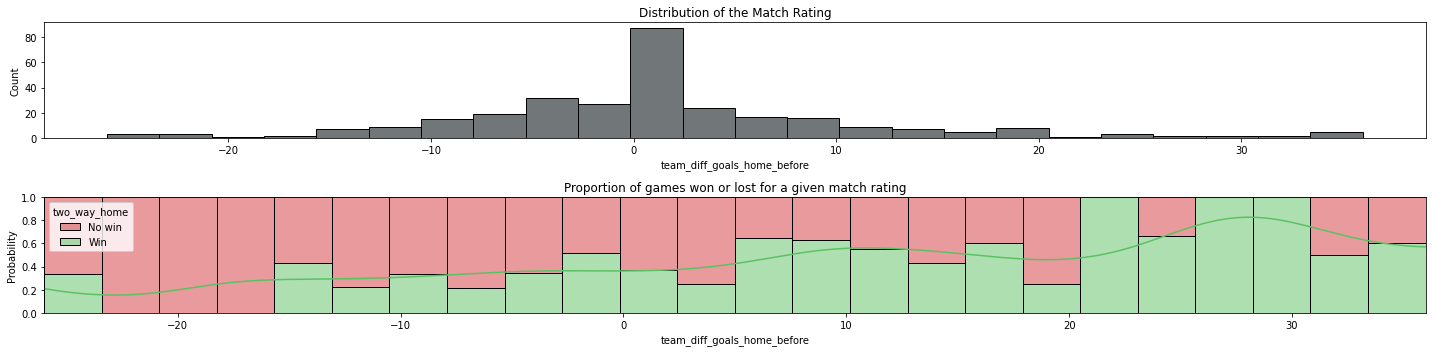

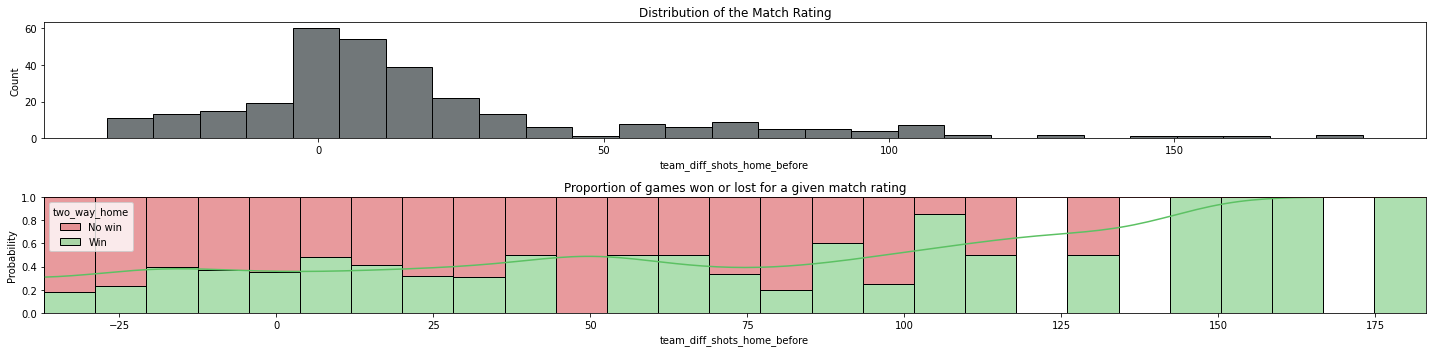

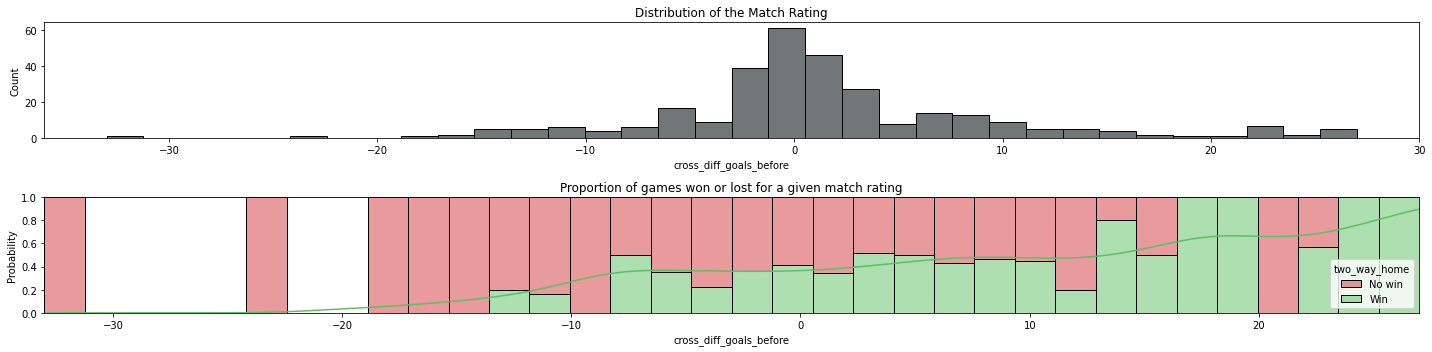

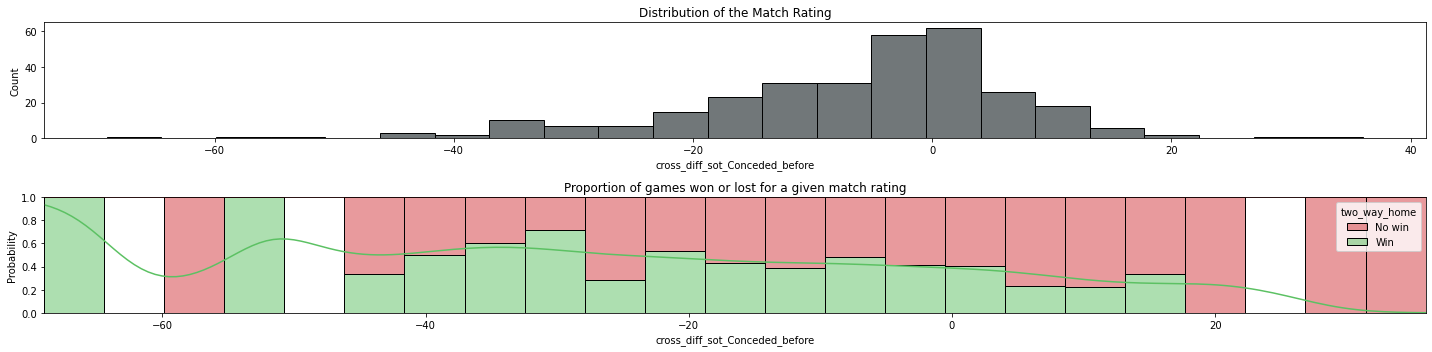

In [22]:
ratings = ['team_diff_goals_home_before', 'team_diff_shots_home_before', 
           'cross_diff_goals_before', 'cross_diff_sot_Conceded_before']

for rating in ratings:
    match_r('D1', rating, '19/20')

In the examples shown, a correlation between match rating and match outcome can be seen in each case, so that the features can certainly be assessed as suitable for prediction. From the random representation, however, it is not possible to see whether there is a correlation between any match ratings and the outcome of the match. This circumstance is not a bad thing at first, however, since dimensionality reduction is performed due to the large number of features available and thus irrelevant features are filtered out of the set of suitable features anyway.

The features used for model building are listed in the [following notebook](https://github.com/mue94/oddstradamus/blob/main/04_Model_Preprocessing.ipynb).